In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [18]:
true_df = pd.read_csv("true.csv")
fake_df = pd.read_csv("fake.csv")



In [19]:
true_df['label'] = 1  # Real News
fake_df['label'] = 0  # Fake News

# Combine datasets
data = pd.concat([true_df, fake_df], axis=0)
data = data.sample(frac=1).reset_index(drop=True)  # Shuffle the data


label
0    23481
1    21417
Name: count, dtype: int64


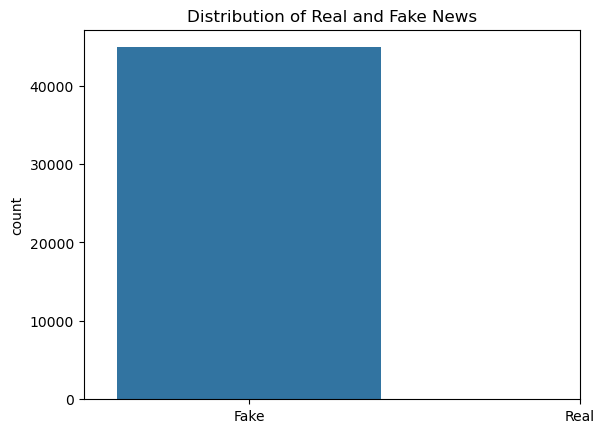

In [20]:
print(data['label'].value_counts())
sns.countplot(data['label'])
plt.title('Distribution of Real and Fake News')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()


In [27]:
# We will only use the 'text' column for classification
X = data['text']
y = data['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [23]:
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(X_train_tfidf, y_train)


PassiveAggressiveClassifier(max_iter=50)

Accuracy: 0.9953229398663697

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4656
           1       0.99      1.00      1.00      4324

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



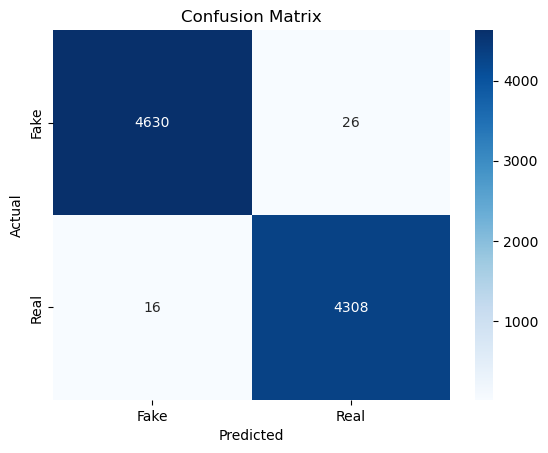

In [24]:
y_pred = classifier.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", 
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [25]:
def predict_news(text):
    tfidf_text = tfidf_vectorizer.transform([text])
    prediction = classifier.predict(tfidf_text)
    return "Real News" if prediction[0] == 1 else "Fake News"

# Try it
sample_news = "President signs a new policy to boost technology startups in the country."
print(predict_news(sample_news))


Real News
